In [1]:
import sys
sys.path.append("../src/")
from ECALDataAnalyzer import ECALDataAnalyzer
#from plot_tools_ecal import plot_ecal_peaks, plot_ecal_peaks_with_intersections
from TrainData import TrainData
import pandas as pd

2024-08-27 13:17:42.696130: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 13:17:43.723284: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/usr/local/nvidia/lib:/usr/local/nvidia/lib64:/.singularity.d/libs
2024-08-27 13:17:43.723426: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/slurm/lib:/usr/local/nvidia/lib:/us

In [3]:
ana = ECALDataAnalyzer(input_filename = '../projects/dis.true.08.21.2024.16.02/dst/clasdispr.00.e10.600.emn0.75tmn.09.xs68.34nb.dis.0000.hipo',
                       output_filename = 'output.csv')
ana.process_hipo()

2000it [00:59, 33.43it/s]
  0%|                                                 | 0/7777 [00:00<?, ?it/s]


NameError: name 'closest_point_between_lines' is not defined

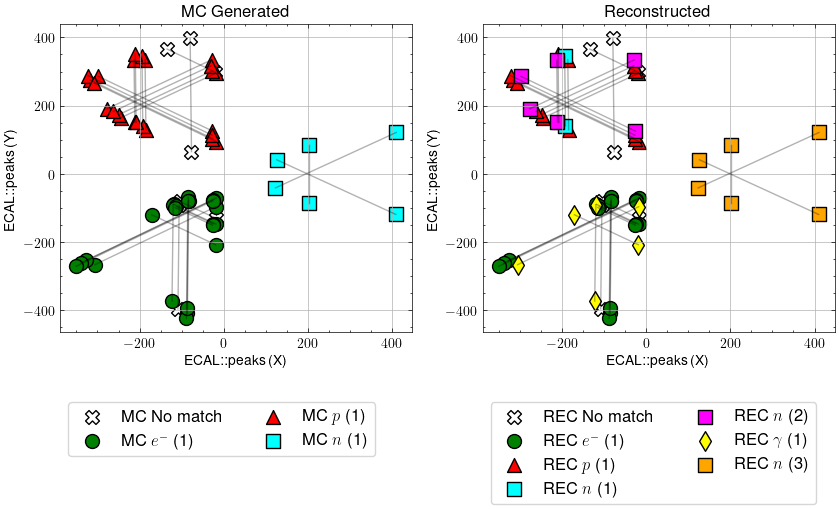

In [3]:
plot_ecal_peaks("output.csv", event_number=3)

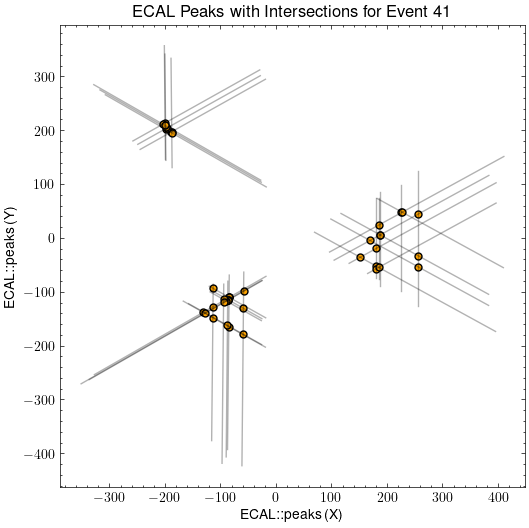

In [4]:
plot_ecal_peaks_with_intersections("output.csv", "output-intersections.csv",event_number=41)

In [33]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
data.get_train_data().columns

Index(['file_number', 'file_event_number', 'global_event_number',
       'unique_mc_index', 'mc_pid', 'energy_A', 'energy_B', 'time_A', 'time_B',
       'x_rot', 'y_rot', 'sector_1', 'sector_2', 'sector_3', 'sector_4',
       'sector_5', 'sector_6', 'layer_A_1', 'layer_A_2', 'layer_A_3',
       'layer_A_4', 'layer_A_5', 'layer_A_6', 'layer_A_7', 'layer_A_8',
       'layer_A_9', 'layer_B_1', 'layer_B_2', 'layer_B_3', 'layer_B_4',
       'layer_B_5', 'layer_B_6', 'layer_B_7', 'layer_B_8', 'layer_B_9'],
      dtype='object')

In [5]:
from ECALDataReader import ECALDataReader

In [67]:
reader = ECALDataReader('/w/hallb-scshelf2102/clas12/users/gmat/clas12/coatjava_dev/coatjava/playground/output/08_20_2024_0002/cooked.hipo')
#reader = ECALDataReader('/w/hallb-scshelf2102/clas12/users/gmat/clas12/coatjava_dev/coatjava/playground/output/08_/cooked.hipo')

In [74]:
for event_number, event in enumerate(reader.file):
    rec_track = reader.get_dict("REC::Track")
    rec_traj  = reader.get_dict("REC::Traj")
    mc_true   = reader.get_dict("MC::True")
    rec_part  = reader.get_dict("REC::Particle")
    mc_part   = reader.get_dict("MC::Particle")
    ecal_hits = reader.get_dict("ECAL::hits+")
    break
print(rec_part)
print(mc_part)

    pid        px        py        pz        vx        vy        vz  \
0   211 -0.667920  0.541837  2.109585  0.026799  0.000803 -0.770112   
1  -211  0.440471 -0.827991  7.117571  3.292119  1.763162  2.007766   
2  -321  0.222002  0.396940  1.277477 -2.070254  1.133844 -1.949308   
3     0 -0.034897 -0.177502  0.184418 -0.004920 -0.000802  0.238327   
4  2112  0.125985 -0.188803  0.204939  0.026799  0.000803 -0.770112   

           vt  charge       beta      chi2pid  status  
0  123.974312       1   0.998129    18.222937   -2100  
1  124.066971      -1   1.001584  9999.000000    2011  
2  123.934982      -1   0.938675     0.410330    2110  
3  124.007950       1 -99.000000  9999.000000    4000  
4   -1.000000       0   0.309498  9999.000000    4010  
    pid      px      py      pz     vx      vy   vz     vt
0    11  0.4943 -0.7441  7.0073 -0.009 -0.0002  0.0  124.0
1   321 -0.0347 -0.1812  0.1939 -0.009 -0.0002  0.0  124.0
2  -321  0.2121  0.3804  1.2818 -0.009 -0.0002  0.0  124.0
3

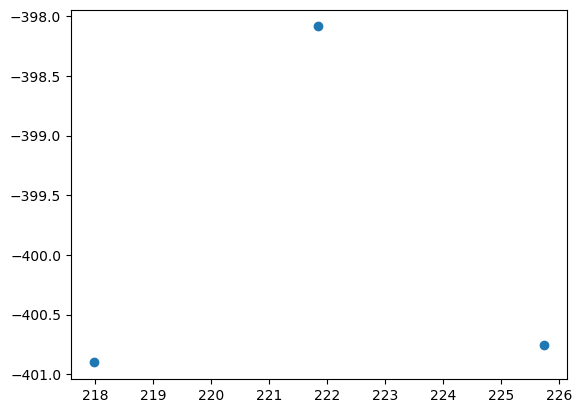

In [75]:
df = mc_true[(mc_true["detector"]==7)&(mc_true["procID"]==999)&(mc_true["pid"]==11)&(mc_true["otid"]==1)]
x = df["avgX"]
y = df["avgY"]
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [76]:
display(ecal_hits)

,id,pid,otid,sector,layer,energy,time,clusterId,xo,yo,zo,xe,ye,ze
0,31,11,1,1,1,0.001440,151.982422,-1,50.248650,-10.964543,764.639771,50.248650,7.884543,764.639771
1,34,11,1,1,7,0.001200,152.874908,-1,66.306366,-9.172138,813.787659,66.306366,7.668139,813.787659
2,42,11,1,1,9,0.001490,152.356049,-1,410.642883,162.567505,655.953125,86.650177,-20.525021,807.033386
3,51,11,1,1,9,0.002680,152.473953,-1,410.642883,173.866364,655.953125,76.653183,-14.875586,811.695068
4,33,11,1,1,9,0.009220,152.388290,-1,410.642883,196.464111,655.953125,56.659187,-3.576717,821.018433
5,9,-321,3,2,1,0.001173,154.580414,1,66.253845,57.685673,749.328308,18.021988,85.532349,749.328308
6,8,-321,3,2,1,0.004967,154.500168,1,70.287292,60.066277,747.426575,18.066927,90.215714,747.426575
7,4,-321,3,2,1,0.003647,154.387253,1,74.320740,62.446877,745.524780,18.111866,94.899086,745.524780
8,5,-321,3,2,2,0.003060,173.922256,1,17.772442,36.988892,770.330627,356.369293,236.875992,610.664246
9,7,-321,3,2,3,0.004873,174.024826,1,64.441559,57.165230,752.642273,67.802269,404.079010,611.763000


In [79]:
mc_true[(mc_true["detector"]==7)]

,detector,pid,mpid,tid,mtid,otid,trackE,totEdep,avgX,avgY,avgZ,avgLx,avgLy,avgLz,px,py,pz,vx,vy,vz,mvx,mvy,mvz,avgT,nsteps,procID,hitn
171,7,2212,0,4,0,4,2447.043701,10.278438,-2925.464355,1392.273071,6486.799805,1383.773071,-16.168745,4.619109,-1065.226196,507.518036,1927.534058,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,150.231766,23,999,1
172,7,2212,0,4,0,4,2441.291504,12.546235,-2927.508301,1393.274414,6490.240723,-1014.050903,6.541187,-3.178984,-1059.312744,491.558105,1927.635132,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,150.246964,24,999,2
173,7,2212,0,4,0,4,2434.859131,10.329103,-2935.218506,1397.257935,6504.755371,508.159027,1.074442,4.738489,-1049.790527,487.519379,1925.733398,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,150.309433,11,999,3
174,7,-321,0,3,0,3,1416.750977,4.201591,646.842834,639.508728,7377.711914,233.547958,0.904790,3.961569,-106.302841,-13.034550,1323.630005,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,150.831680,4,999,4
175,7,-321,0,3,0,3,1410.643188,11.043303,638.663940,636.399719,7456.948730,1536.319580,1.087597,-3.475677,-105.382851,-7.175072,1317.209229,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,151.116623,15,999,5
176,7,-321,0,3,0,3,1404.274658,2.410107,646.473816,639.370911,7383.658691,1760.854492,-21.442533,3.927881,-110.687866,-14.212663,1309.891846,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,150.852859,2,999,6
177,7,-321,0,3,0,3,1387.192139,7.520886,636.975464,635.963257,7474.429199,1793.525879,-2.899708,3.385978,-143.562271,-44.586029,1287.628418,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,151.179169,9,999,7
178,7,-321,0,3,0,3,1380.548828,4.646578,638.203552,636.650146,7462.116211,227.495407,4.075347,3.730349,-134.929520,-86.825920,1279.239380,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,151.134796,4,999,8
179,7,-321,0,3,0,3,1345.424805,2.039173,630.981628,632.771301,7529.442871,223.180466,14.304884,3.843811,-141.547348,-60.892307,1242.057739,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,151.377625,2,999,9
180,7,-321,0,3,0,3,1335.637939,2.042222,627.261108,631.785400,7558.632324,1824.441895,16.763683,3.847624,-173.128555,-33.021210,1228.473755,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,151.483292,2,999,10


In [78]:
mc_true[(mc_true["detector"]==7)&(mc_true["otid"]==1)]

,detector,pid,mpid,tid,mtid,otid,trackE,totEdep,avgX,avgY,avgZ,avgLx,avgLy,avgLz,px,py,pz,vx,vy,vz,mvx,mvy,mvz,avgT,nsteps,procID,hitn
184,7,11,0,1,0,1,6233.421387,23.660337,225.741302,-400.753479,7590.673340,-6.980973,-14.515944,2.980779,-30.473679,23.596350,6233.302246,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,149.423691,50,999,14
185,7,11,0,1,0,1,4425.053223,203.216904,221.849152,-398.086853,7673.182129,2055.961182,-3.087386,-2.046365,-22.335798,17.296110,4424.962891,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,149.704498,422,999,15
186,7,11,0,1,0,1,114.700607,249.077271,217.975204,-400.900757,7669.091309,2051.684326,-6.656344,1.560071,-9.080513,6.364654,114.162178,-0.090000,-0.002000,0.000000,0.000000,0.000000,0.000000,149.696854,570,999,16
187,7,11,22,615,613,1,0.582019,42.552246,192.739380,-385.841431,7719.949707,2080.441162,5.532289,-0.185267,-0.112963,0.161272,0.197121,177.781235,-360.309540,7675.545898,219.243622,-394.568512,7641.901855,149.913376,93,2,17
188,7,-11,22,642,565,1,5.586800,141.336014,221.713821,-400.269470,7661.581055,-3.735068,-1.687806,2.029079,-0.441049,-4.075341,3.761421,218.541855,-396.305511,7625.867188,220.631500,-400.320526,7582.161621,149.664536,324,5,18
189,7,11,22,641,565,1,1.163436,53.758736,217.916809,-392.336243,7711.173828,-4.413373,14.405974,2.315495,-0.622741,0.659137,0.519802,218.541855,-396.305511,7625.867188,220.631500,-400.320526,7582.161621,149.836090,127,5,19
190,7,11,22,737,728,1,0.788995,1.774285,352.600555,-537.926941,7845.934570,1988.941406,-27.731365,0.305919,0.400259,-0.430306,0.126583,357.334473,-557.715820,7909.164062,244.196030,-408.010956,7727.447754,150.647583,6,2,20
191,7,11,22,735,728,1,0.785875,0.480039,335.767883,-517.122803,7876.627930,-38.042114,-19.200712,3.215688,0.509542,-0.294530,-0.100497,334.306366,-535.312439,7870.272949,244.196030,-408.010956,7727.447754,150.734970,2,2,21
192,7,11,22,748,720,1,1.712498,77.464600,227.914642,-388.320587,7722.923828,2065.211182,12.272724,2.426746,0.946690,-0.329214,1.291095,254.108917,-412.107727,7727.185059,236.387650,-402.728027,7703.622070,149.891129,197,2,22
193,7,11,22,914,886,1,0.797729,0.672564,268.529480,-531.504150,8062.750488,27.378721,43.762844,-1.478210,0.359517,0.022339,0.495480,252.562500,-546.743164,8087.758789,216.201904,-407.242126,7691.158203,151.078674,8,2,23


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

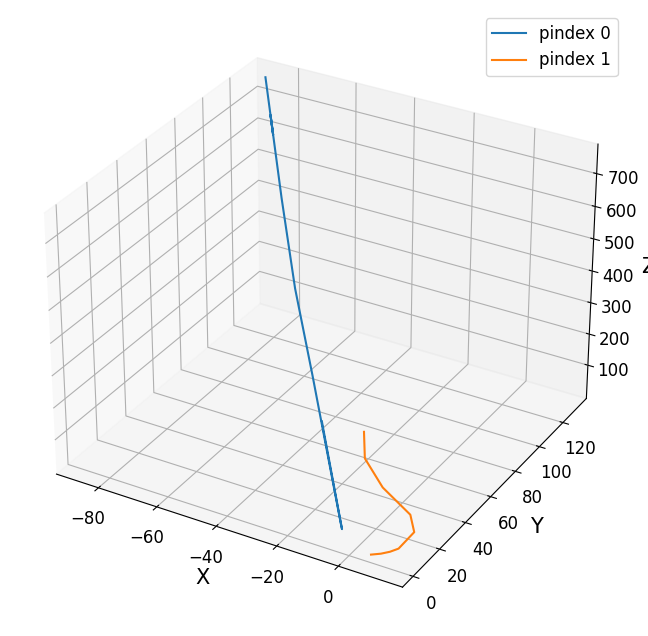

In [13]:
# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot each unique pindex trajectory
for pindex in rec_traj['pindex'].unique():
    traj_data = rec_traj[rec_traj['pindex'] == pindex]
    ax.plot(traj_data['x'], traj_data['y'], traj_data['z'], label=f'pindex {pindex}')

# Labeling the axes with large font sizes
ax.set_xlabel('X', fontsize=15)
ax.set_ylabel('Y', fontsize=15)
ax.set_zlabel('Z', fontsize=15)

# Set larger tick sizes
ax.tick_params(axis='both', which='major', labelsize=12)

# Add a legend
ax.legend(fontsize=12)

# Show the plot
plt.show()

In [80]:
df = pd.read_csv("../projects/dis.true.08.21.2024.16.02/training/clasdispr.00.e10.600.emn0.75tmn.09.xs68.34nb.dis.0000.csv")
intersection_df = pd.read_csv("../projects/dis.true.08.21.2024.16.02/training/clasdispr.00.e10.600.emn0.75tmn.09.xs68.34nb.dis.0000-intersections.csv")
display(df)

,event_number,id,mc_pid,otid,sector,layer,energy,time,xo,yo,zo,xe,ye,ze,rec_pid,pindex
0,0,11.0,22.0,6.0,1.0,1.0,0.002060,149.535004,152.208282,-68.533699,717.095215,152.208282,65.453705,717.095215,22.0,2.0
1,0,1.0,22.0,6.0,1.0,1.0,0.023353,149.671356,156.286667,-70.836472,715.193481,156.286667,67.756470,715.193481,22.0,2.0
2,0,2.0,22.0,6.0,1.0,2.0,0.007480,165.750534,139.208267,57.853260,724.497864,383.129211,-79.841469,610.755615,22.0,2.0
3,0,12.0,22.0,6.0,1.0,2.0,0.004320,166.018539,134.731125,55.325886,726.585571,383.128662,-84.895897,610.755920,22.0,2.0
4,0,3.0,22.0,6.0,1.0,3.0,0.003740,165.796310,54.656002,-12.913177,765.265808,383.631989,172.795578,611.861816,22.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101479,1999,55.0,11.0,1.0,6.0,7.0,0.002600,152.480881,25.538364,-62.238022,813.618652,40.122475,-53.817883,813.618652,-1.0,-1.0
101480,1999,33.0,11.0,1.0,6.0,8.0,0.001370,178.249008,30.367386,-48.137737,819.552979,34.110474,-453.814941,654.853943,-1.0,-1.0
101481,1999,26.0,11.0,1.0,6.0,9.0,0.001860,150.981750,356.222626,-268.922943,655.784058,25.772442,-74.050346,811.526001,-1.0,-1.0
101482,1999,54.0,11.0,1.0,6.0,9.0,0.005850,151.186249,366.007721,-263.273499,655.784058,25.666496,-62.567978,816.187683,-1.0,-1.0


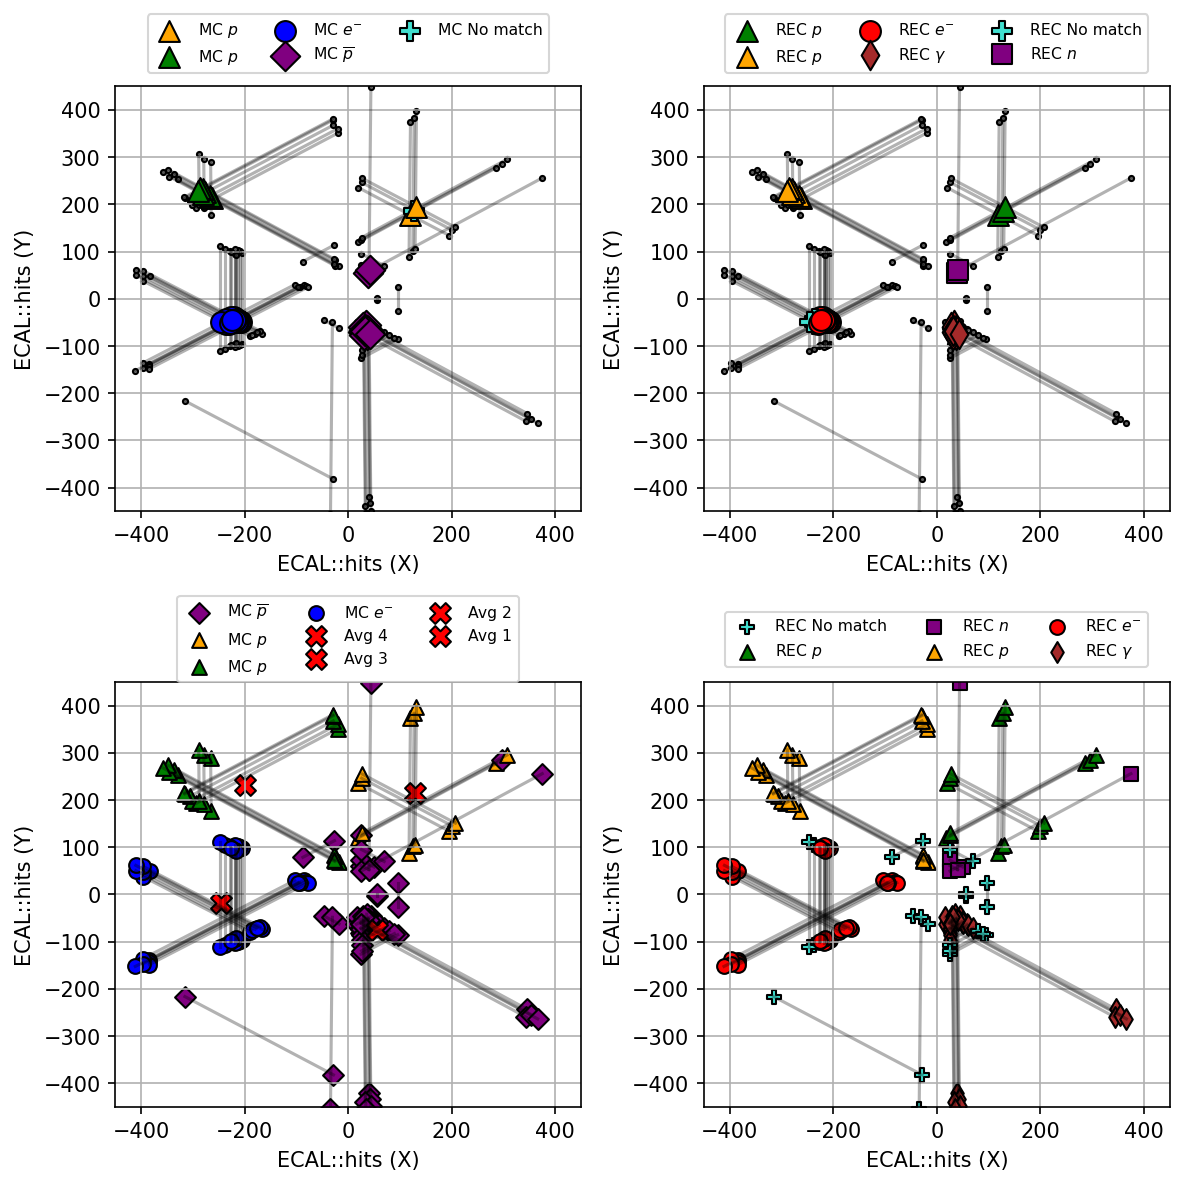

In [86]:
import matplotlib.pyplot as plt
import random
from particle import Particle

# Generate a list of 20 colors
colors = [
    'red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray',
    'cyan', 'magenta', 'yellow', 'lime', 'maroon', 'navy', 'olive', 'teal',
    'gold', 'violet', 'indigo', 'turquoise'
]
def assign_marker(pid):
    marker_map = {
        11: 'o',  # electron
        2112: 's',  # neutron
        2212: '^',  # proton
        13: 'v',  # muon
        22: 'd',  # photon
        111: 'p',  # pi0
        211: 'H',  # pi+
        -211: 'h',  # pi-
        321: '*',  # K+
        -321: 'X',  # K-
        -1: 'P',  # Background
    }
    return marker_map.get(pid, 'D')  # default to 'D' if PID not in map

def get_particle_name(pid):
    if pid == -1:
        return "No match"
    try:
        particle = Particle.from_pdgid(pid)
        return f"${particle.latex_name}$"
    except Exception:
        return f"PID {pid}"
    
def plot_event(df, intersection_df, event_number):
    # Filter the data for the selected event
    event_data = df[df['event_number'] == event_number]
    event_intersections = intersection_df[intersection_df['event_number'] == event_number]

    fig, axes = plt.subplots(2, 2, figsize=(8, 8),dpi=150)

    # Plot 1: using otid and mc_pid
    added_otid = set()

    for _, row in event_intersections.iterrows():
        color = colors[int(row['otid']) % 20]
        label = f'MC {get_particle_name(row["mc_pid"])}'
        marker = assign_marker(row["mc_pid"])
        otid = int(row["otid"])

        if otid not in added_otid:
            axes[0, 0].scatter(row['centroid_x'], row['centroid_y'], color=color, s=100, marker=marker, label=label, zorder=10, edgecolor="k")
            added_otid.add(otid)
        else:
            axes[0, 0].scatter(row['centroid_x'], row['centroid_y'], color=color, s=100, marker=marker, zorder=10, edgecolor="k")

    # Plot all the lines as black lines in the first plot
    for _, row in event_data.iterrows():
        axes[0, 0].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
        axes[0, 0].scatter(row['xo'], row['yo'], marker="o", s=6, edgecolor="k", color="grey")
        axes[0, 0].scatter(row['xe'], row['ye'], marker="o", s=6, edgecolor="k", color="grey")
    axes[0, 0].set_xlabel('ECAL::hits (X)')
    axes[0, 0].set_ylabel('ECAL::hits (Y)')
    axes[0, 0].legend(bbox_to_anchor=(0.5, 1.1), loc="center", ncols=3,fontsize=7.5)
    axes[0, 0].grid(True)
    axes[0, 0].set_xlim(-450, 450)
    axes[0, 0].set_ylim(-450, 450)

    # Plot 2: using pindex and rec_pid
    added_pindex = set()

    for _, row in event_intersections.iterrows():
        color = colors[int(row['pindex']) % 20]
        label = f'REC {get_particle_name(row["rec_pid"])}'
        marker = assign_marker(row["rec_pid"])
        pindex = int(row["pindex"])

        if pindex not in added_pindex:
            axes[0, 1].scatter(row['centroid_x'], row['centroid_y'], color=color, s=100, marker=marker, label=label, zorder=10, edgecolor="k")
            added_pindex.add(pindex)
        else:
            axes[0, 1].scatter(row['centroid_x'], row['centroid_y'], color=color, s=100,  marker=marker, zorder=10, edgecolor="k")

    # Plot all the lines as black lines in the second plot
    for _, row in event_data.iterrows():
        axes[0, 1].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
        axes[0, 1].scatter(row['xo'], row['yo'], marker="o", s=6, edgecolor="k", color="grey")
        axes[0, 1].scatter(row['xe'], row['ye'], marker="o", s=6, edgecolor="k", color="grey")
    axes[0, 1].set_xlabel('ECAL::hits (X)')
    axes[0, 1].set_ylabel('ECAL::hits (Y)')
    axes[0, 1].legend(bbox_to_anchor=(0.5, 1.1), loc="center", ncols=3,fontsize=7.5)
    axes[0, 1].grid(True)
    axes[0, 1].set_xlim(-450, 450)
    axes[0, 1].set_ylim(-450, 450)

    # Plot 3: lines with endpoints colored by otid, labeling mc_pid
    # Initialize a set to keep track of added `otid`s
    added_otid = set()

    # Prepare a dictionary to accumulate sums for 'xo', 'xe', 'yo', and 'ye' based on `otid`
    otid_sums = {}

    # Iterate through each row in the dataframe
    for _, row in event_data.iterrows():
        color = colors[int(row['otid']) % 20]
        label = f'MC {get_particle_name(row["mc_pid"])}'
        marker = assign_marker(row["mc_pid"])
        otid = int(row['otid'])

        # Sum the 'xo' and 'xe' values, and 'yo' and 'ye' values for each unique `otid`
        if otid not in otid_sums:
            otid_sums[otid] = {'sum_x': 0, 'sum_y': 0, 'count': 0}

        otid_sums[otid]['sum_x'] += row['xo'] + row['xe']
        otid_sums[otid]['sum_y'] += row['yo'] + row['ye']
        otid_sums[otid]['count'] += 2  # Since we're adding both 'xo', 'xe' and 'yo', 'ye'

        if otid not in added_otid:
            axes[1, 0].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
            axes[1, 0].scatter(row['xo'], row['yo'], s=50, marker=marker, edgecolor="k", color=color, label=label)
            axes[1, 0].scatter(row['xe'], row['ye'], s=50, marker=marker, edgecolor="k", color=color)
            added_otid.add(otid)
        else:
            axes[1, 0].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
            axes[1, 0].scatter(row['xo'], row['yo'], s=50, marker=marker, edgecolor="k", color=color)
            axes[1, 0].scatter(row['xe'], row['ye'], s=50, marker=marker, edgecolor="k", color=color)

    # After iterating over all rows, calculate the average positions for each `otid`
    for otid, sums in otid_sums.items():
        avg_x = sums['sum_x'] / sums['count']
        avg_y = sums['sum_y'] / sums['count']

        # Plot the average position as an "X" marker
        axes[1, 0].scatter(avg_x, avg_y, s=100, marker='X', edgecolor="k", color='red', label=f'Avg {otid}')

    # Set labels, legend, grid, and limits
    axes[1, 0].set_xlabel('ECAL::hits (X)')
    axes[1, 0].set_ylabel('ECAL::hits (Y)')
    axes[1, 0].legend(bbox_to_anchor=(0.5, 1.1), loc="center", ncols=3, fontsize=7.5)
    axes[1, 0].grid(True)
    axes[1, 0].set_xlim(-450, 450)
    axes[1, 0].set_ylim(-450, 450)

    # Plot 4: lines with endpoints colored by pindex, labeling rec_pid
    added_pindex = set()
    for _, row in event_data.iterrows():
        color = colors[int(row['pindex']) % 20]
        label = f'REC {get_particle_name(row["rec_pid"])}'
        marker = assign_marker(row["rec_pid"])
        pindex = int(row["pindex"])

        if pindex not in added_pindex:
            axes[1, 1].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
            axes[1, 1].scatter(row['xo'], row['yo'], s=50, marker=marker,edgecolor="k", color=color, label=label)
            axes[1, 1].scatter(row['xe'], row['ye'], s=50, marker=marker,edgecolor="k", color=color)
            added_pindex.add(pindex)
        else:
            axes[1, 1].plot([row['xo'], row['xe']], [row['yo'], row['ye']], color='black', alpha=0.3)
            axes[1, 1].scatter(row['xo'], row['yo'], s=50, marker=marker,edgecolor="k", color=color)
            axes[1, 1].scatter(row['xe'], row['ye'], s=50, marker=marker,edgecolor="k", color=color)
    axes[1, 1].set_xlabel('ECAL::hits (X)')
    axes[1, 1].set_ylabel('ECAL::hits (Y)')
    axes[1, 1].legend(bbox_to_anchor=(0.5, 1.1), loc="center", ncols=3,fontsize=7.5)
    axes[1, 1].grid(True)
    axes[1, 1].set_xlim(-450, 450)
    axes[1, 1].set_ylim(-450, 450)

    plt.tight_layout()
    plt.show()

# Example usage: Randomly select an event to plot
random_event = random.choice(intersection_df['event_number'].unique())
plot_event(df, intersection_df, random_event)


In [83]:
intersection_df[intersection_df["event_number"]==random_event]

,event_number,centroid_x,centroid_y,time_A,time_B,time_C,energy_A,energy_B,energy_C,layer,sector,mc_pid,otid,rec_pid,pindex,xo_A,yo_A,xe_A,ye_A,xo_B,yo_B,xe_B,ye_B,xo_C,yo_C,xe_C,ye_C
65644,1037,176.959303,-19.376541,154.898315,164.440125,164.557938,0.006660,0.005033,0.00548,1.0,1.0,-211.0,4.0,-211.0,0.0,176.678589,-82.350296,176.678589,79.270302,89.959679,30.052158,383.123016,-135.440170,121.813171,-50.823769,383.640442,96.979179
65645,1037,179.678226,-19.376541,154.701920,164.440125,164.557938,0.003387,0.005033,0.00548,1.0,1.0,-211.0,4.0,-211.0,0.0,180.756973,-84.653069,180.756973,81.573067,89.959679,30.052158,383.123016,-135.440170,121.813171,-50.823769,383.640442,96.979179
65646,1037,180.934624,-17.305139,155.433548,166.747864,153.030838,0.017050,0.003940,0.00261,2.0,1.0,-211.0,4.0,-211.0,0.0,179.055725,-73.965828,179.055725,72.461830,102.513741,29.135111,395.684723,-136.539658,396.619629,102.457695,131.869019,-47.156334
65647,1037,154.244599,4.722293,159.035904,177.374146,163.896027,0.001760,0.007500,0.00255,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,106.270691,30.180666,409.708008,-141.295731,410.642883,151.268631,96.647179,-26.174454
65648,1037,157.591863,-12.200697,159.035904,168.945847,156.074921,0.001760,0.010860,0.04886,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,96.318489,24.556545,409.708008,-152.543976,410.642883,128.670898,116.641174,-37.473324
65649,1037,157.606795,-23.474249,159.035904,184.734650,164.411346,0.001760,0.000960,0.00182,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,86.366287,18.932425,409.708008,-163.792206,410.642883,117.372025,126.638168,-43.122757
65650,1037,154.274463,-17.824816,159.035904,184.734650,156.074921,0.001760,0.000960,0.04886,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,86.366287,18.932425,409.708008,-163.792206,410.642883,128.670898,116.641174,-37.473324
65651,1037,157.636654,-46.021358,159.035904,178.081207,155.591995,0.001760,0.006980,0.03644,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,66.461876,7.684182,409.708008,-186.288696,410.642883,94.774292,146.632156,-54.421623
65652,1037,154.304323,-40.371925,159.035904,178.081207,156.372864,0.001760,0.006980,0.04783,3.0,1.0,-211.0,4.0,-1.0,-1.0,155.706528,-59.693340,155.706528,58.189339,66.461876,7.684182,409.708008,-186.288696,410.642883,106.073158,136.635162,-48.772190
65653,1037,174.123869,15.970537,161.386215,172.193863,163.896027,0.001350,0.009030,0.00255,3.0,1.0,-211.0,4.0,-1.0,-1.0,175.573227,-70.920273,175.573227,69.416275,126.175102,41.428909,409.708008,-118.799240,410.642883,151.268631,96.647179,-26.174454


In [10]:
df[df["event_number"]==random_event]

,event_number,id,mc_pid,otid,sector,layer,energy,time,xo,yo,zo,xe,ye,ze,rec_pid,pindex
2345,49,72.0,211.0,2.0,3.0,1.0,0.021233,162.024628,-18.611925,259.582855,678.903259,-214.418579,146.533829,678.903259,321.0,1.0
2346,49,70.0,211.0,2.0,3.0,1.0,0.005540,161.324829,-18.656862,264.266235,677.001465,-218.452026,148.914429,677.001465,321.0,1.0
2347,49,106.0,211.0,2.0,3.0,1.0,0.010520,163.556656,-18.948963,294.708130,664.639893,-244.669434,164.388336,664.639893,22.0,3.0
2348,49,6.0,211.0,5.0,3.0,1.0,0.005933,162.300674,-20.207237,425.842438,611.389954,-357.605957,231.045197,611.389954,22.0,4.0
2349,49,7.0,211.0,5.0,3.0,2.0,0.010427,149.569153,-178.222900,125.440918,697.201050,-180.288895,338.705353,610.595825,22.0,4.0
2350,49,105.0,211.0,2.0,3.0,2.0,0.007127,162.171295,-63.112034,57.486427,751.481934,-66.472748,404.400208,610.602661,22.0,3.0
2351,49,71.0,211.0,2.0,3.0,2.0,0.008107,159.479507,-36.547989,41.804619,764.008301,-40.207481,419.560577,610.604248,321.0,1.0
2352,49,86.0,211.0,2.0,3.0,2.0,0.002193,159.757126,-27.693306,36.577351,768.183716,-31.452393,424.614014,610.604797,-1.0,-1.0
2353,49,84.0,211.0,2.0,3.0,3.0,0.001473,158.840012,-18.998333,248.980759,685.775818,-176.097046,341.722351,611.695435,22.0,4.0
2354,49,75.0,211.0,2.0,3.0,3.0,0.004920,159.584091,-18.948528,243.839752,687.863586,-180.474030,339.194641,611.695679,22.0,4.0
